# World Health Organization (WHO) Coronavirus (COVID-19) Dataset
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention.


#### HOW IT SPREADS
The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols.
You can be infected by breathing in the virus if you are near someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth. The virus spreads more easily indoors and in crowded settings.

Consult your local medical authority for advice.
[For more information visit WHO](https://www.who.int/news-room/questions-and-answers/item/coronavirus-disease-covid-19-how-is-it-transmitted)

## About the Dataset
The dataset contains information about countries who reported COVID-19 cases and deaths from January 2020 till date. Following information is provided by WHO in this dataset:
Date_reported	Country_code	Country	WHO_region	New_cases	Cumulative_cases	New_deaths	Cumulative_deaths

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
# plt.style.use('dark_background')

## Loading Dataset

In [2]:
datakey = pd.read_html("https://covid19.who.int/data")[0]
datakey

,Field name,Type,Description
0,Date_reported,Date,Date of reporting to WHO
1,Country_code,String,ISO Alpha-2 country code
2,Country,String,"Country, territory, area"
3,WHO_region,String,WHO regional offices: WHO Member States are gr...
4,New_cases,Integer,New confirmed cases. Calculated by subtracting...
5,Cumulative_cases,Integer,Cumulative confirmed cases reported to WHO to ...
6,New_deaths,Integer,New confirmed deaths. Calculated by subtractin...
7,Cumulative_deaths,Integer,Cumulative confirmed deaths reported to WHO to...


In [3]:
df = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv", parse_dates=['Date_reported'])
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260700 entries, 0 to 260699
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      260700 non-null  datetime64[ns]
 1   Country_code       259600 non-null  object        
 2   Country            260700 non-null  object        
 3   WHO_region         260700 non-null  object        
 4   New_cases          260700 non-null  int64         
 5   Cumulative_cases   260700 non-null  int64         
 6   New_deaths         260700 non-null  int64         
 7   Cumulative_deaths  260700 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 15.9+ MB


In [5]:
df.sort_values(by = 'Date_reported', inplace=True)
df['CumSum_Cases'] = df.New_cases.cumsum()
df['CumSum_Deaths'] = df.New_deaths.cumsum()

# Global Situation

## Cumulative Cases

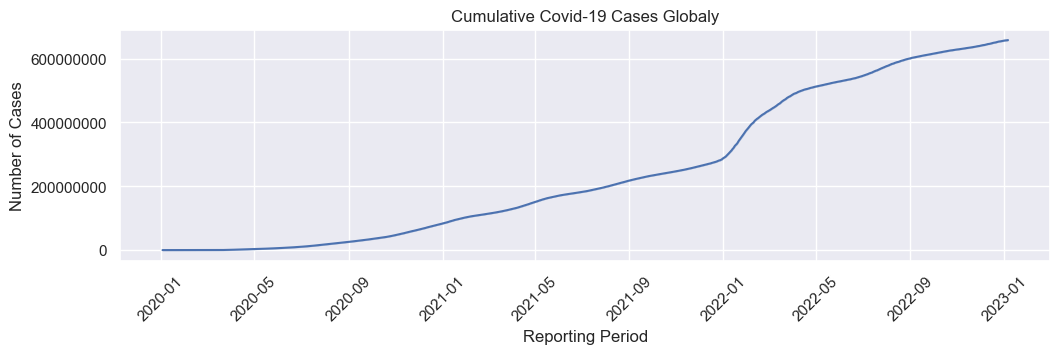

In [6]:
sns.set_theme()
fig = plt.figure(figsize = (12,3))
sns.lineplot(x=df.Date_reported, y=df.CumSum_Cases)
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Number of Cases')
plt.xlabel('Reporting Period')
plt.title('Cumulative Covid-19 Cases Globaly')
plt.show()

## Cumulative Deaths

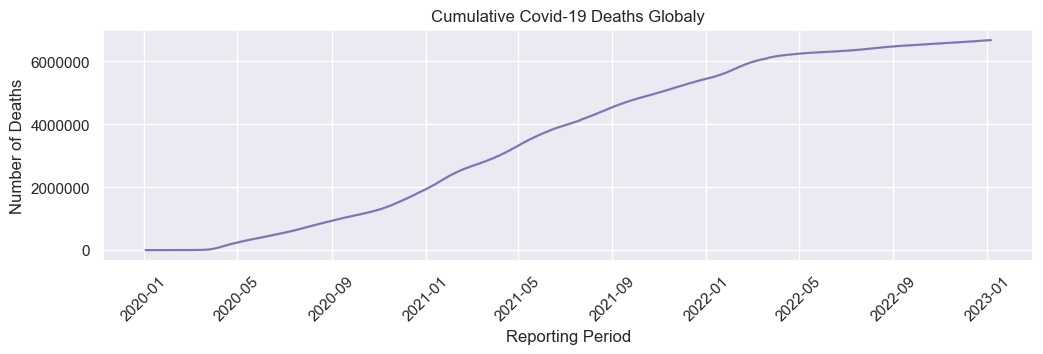

In [7]:
sns.set_theme()
fig = plt.figure(figsize = (12,3))
sns.lineplot(x=df.Date_reported, y=df.CumSum_Deaths, color='m' )
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Number of Deaths')
plt.xlabel('Reporting Period')
plt.title('Cumulative Covid-19 Deaths Globaly')
plt.show()

## Cumulative Cases in WHO Regions

In [8]:
dic={'AFRO':'Africa', 'AMRO':'Americas', 'SEARO':'South-East Asia', 'EURO':'Europe', 'EMRO':'Eastern Mediterranean','WPRO':'Western Pacific', 'Other':'Others'}
df['Region'] = df.WHO_region.map(dic)
df.Region

0         Eastern Mediterranean
123200    Eastern Mediterranean
177100                 Americas
83600                    Africa
239800                   Europe
                  ...          
203499                 Americas
56099                  Americas
204599          Western Pacific
59399                    Europe
260699                   Africa
Name: Region, Length: 260700, dtype: object

In [9]:
set(df.Region)

{'Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'Others',
 'South-East Asia',
 'Western Pacific'}

### Creating DataFrame for each region

In [10]:
import warnings
warnings.filterwarnings('ignore')

rgns = ['Africa', 'Americas', 'Eastern Mediterranean', 
        'Europe', 'South-East Asia', 'Western Pacific']
df_names = ['Africa', 'Americas', 'Eastern_Mediterranean', 
        'Europe', 'South_East_Asia', 'Western_Pacific']
for i, j in zip(rgns, df_names):
    globals()[j] = df[df['Region']==i]


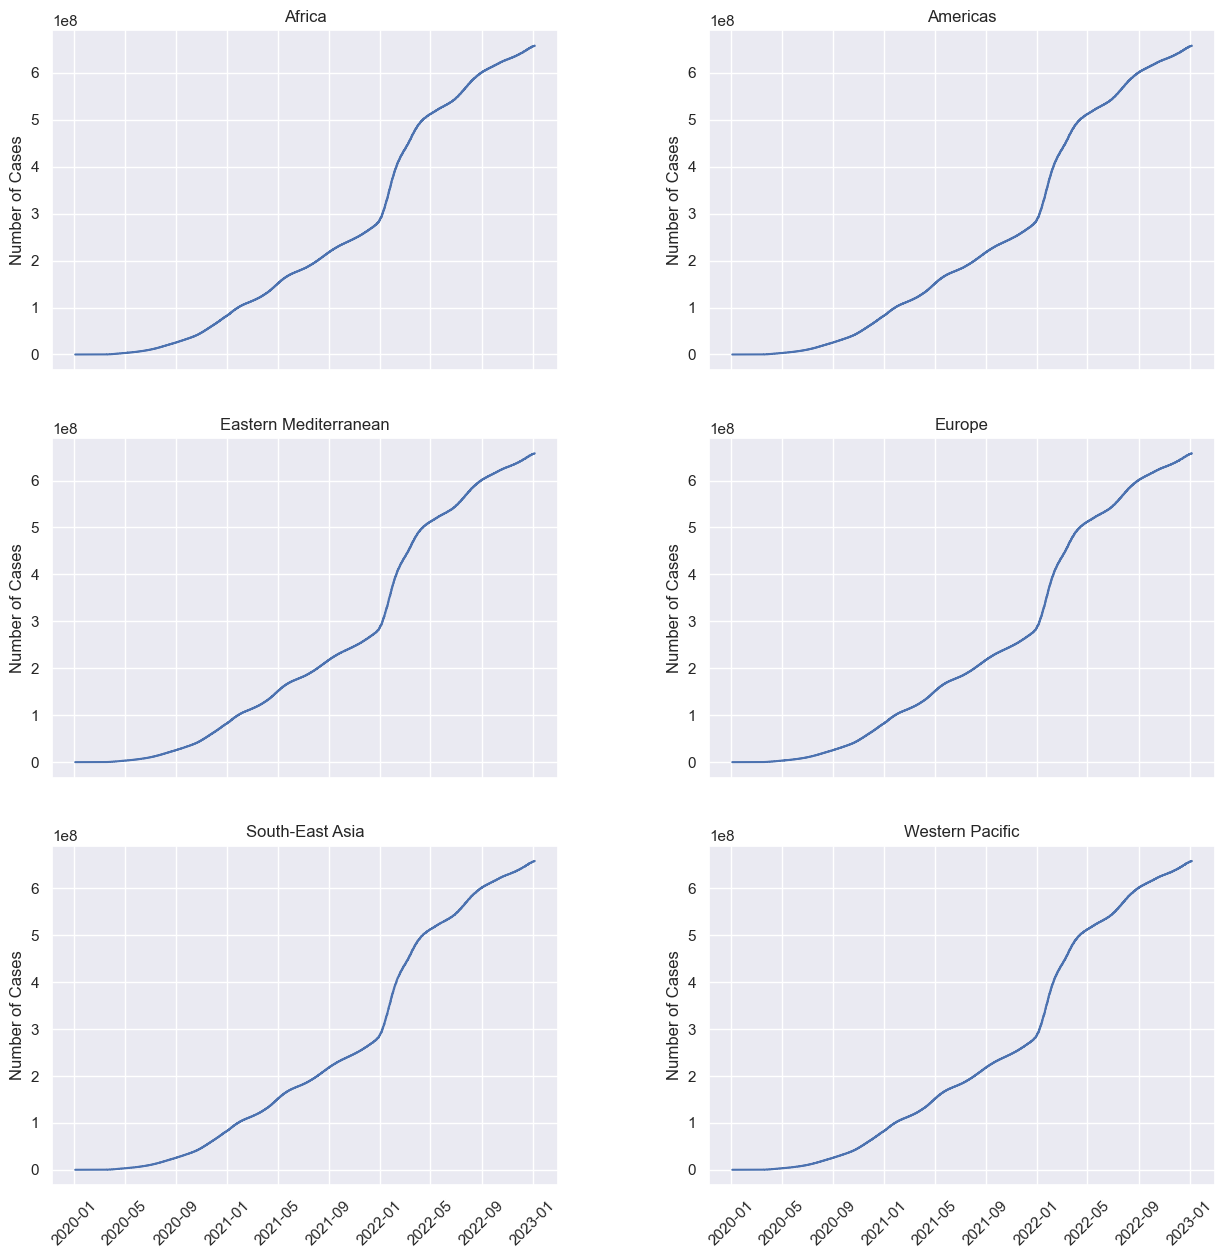

In [11]:
rgns = ['Africa', 'Americas', 'Eastern Mediterranean', 
        'Europe', 'South-East Asia', 'Western Pacific']

names = [Africa, Americas, Eastern_Mediterranean, 
        Europe, South_East_Asia, Western_Pacific]

fig, ax = plt.subplots(3, 2, figsize = (15,15), sharex = True)#, sharey = True)
fig.subplots_adjust(hspace = 0.2, wspace = 0.3)

ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, j in zip(range(6), names):
    axes[i].plot(j.Date_reported, j.CumSum_Cases)
    axes[i].set_title(rgns[i])
    axes[i].tick_params(axis='x', labelrotation = 45)
    axes[i].set_ylabel('Number of Cases')
plt.show()

## Cumulative Deaths in WHO Regions

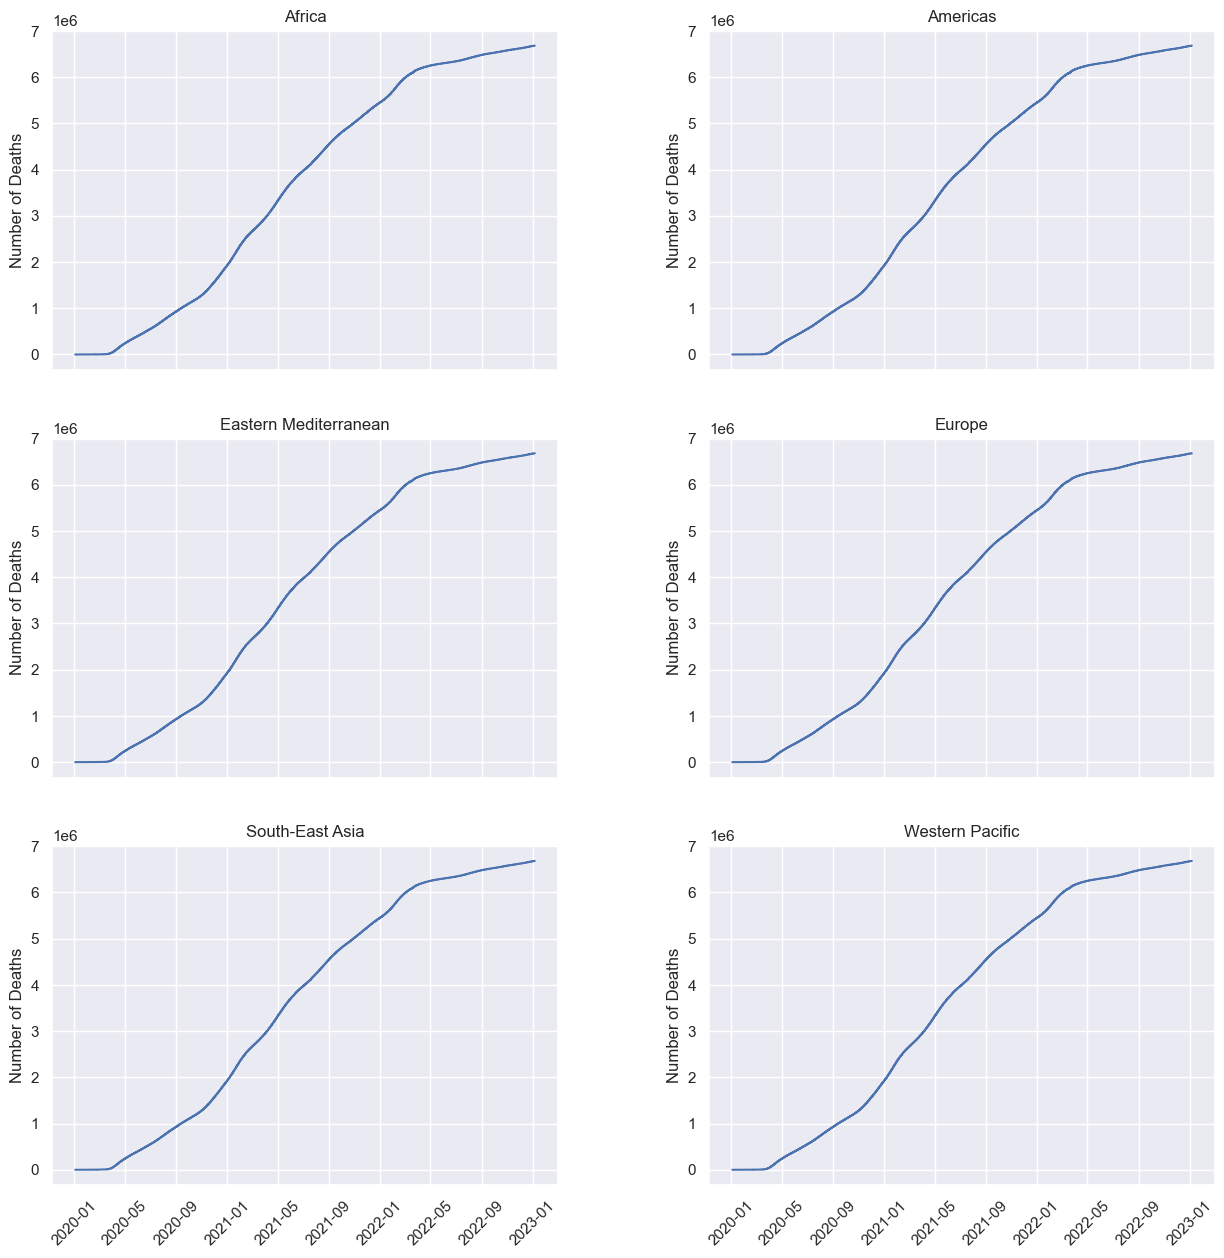

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (15,15), sharex = True)#, sharey = True)
fig.subplots_adjust(hspace = 0.2, wspace = 0.3)

ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, j in zip(range(6), names):
    axes[i].plot(j.Date_reported, j.CumSum_Deaths)
    axes[i].set_title(rgns[i])
    axes[i].tick_params(axis='x', labelrotation = 45)
    axes[i].set_ylabel('Number of Deaths')
plt.show()

## Cumulative Cases in each Country

In [13]:
c = list(set(df.Country))
c.sort()
def create_fare_plot(country):   
    cnt = df[df['Country']==country]
    sns.lineplot(data = cnt, x = 'Date_reported', y ='Cumulative_cases')
    plt.xticks(rotation = 45)
    plt.ylabel('Number of Cases')
    plt.xlabel('Reporting Period')
    plt.title(f'Cumulative Covid-19 Cases in {country}')
    
interact(create_fare_plot, country=c)
plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

## Cumulative Deaths in each Country

In [14]:
c = list(set(df.Country))
c.sort()
def create_fare_plot(country):   
    cnt = df[df['Country']==country]
    sns.lineplot(data = cnt, x = 'Date_reported', y ='Cumulative_deaths')
    plt.xticks(rotation = 45)
    plt.ylabel('Number of Deaths')
    plt.xlabel('Reporting Period')
    plt.title(f'Cumulative Covid-19 Deaths in {country}')
    
interact(create_fare_plot, country=c)
plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

In [16]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,CumSum_Cases,CumSum_Deaths,Region
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,0,0,Eastern Mediterranean
123200,2020-01-03,KW,Kuwait,EMRO,0,0,0,0,0,0,Eastern Mediterranean
177100,2020-01-03,PA,Panama,AMRO,0,0,0,0,0,0,Americas
83600,2020-01-03,GM,Gambia,AFRO,0,0,0,0,0,0,Africa
239800,2020-01-03,TR,Türkiye,EURO,0,0,0,0,0,0,Europe


In [17]:
df.New_deaths.sum()

6681433

In [18]:
df2 = df.groupby(['Country'])['New_deaths'].sum()

In [28]:
df2 = df2.to_frame()

In [32]:
df2.head()

,New_deaths
Country,
Afghanistan,7850
Albania,3596
Algeria,6881
American Samoa,34
Andorra,159


In [34]:
df2.sort_values(by=['New_deaths'], ascending=False, inplace=True)

In [41]:
top10 = df2[:10]

,New_deaths
Country,
United States of America,1082265
Brazil,694411
India,530714
Russian Federation,393986
Mexico,331206
Peru,218304
The United Kingdom,201028
Italy,184642
Germany,162518


In [40]:
df2[df2.index=='China']

,New_deaths
Country,
China,32792


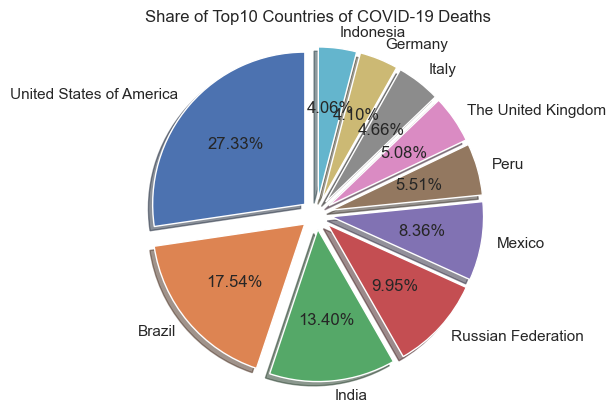

In [48]:
plt.pie(top10.New_deaths,labels=top10.index, startangle=90, 
        shadow=True, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.title('Share of Top10 Countries of COVID-19 Deaths')
plt.axis('equal')
plt.savefig('covid_pie.png')
plt.show()

